# Siga o passo a passo a seguir, programando nos blocos de código as instruções contidas nos blocos de texto.

1. Importe a base de dados de filmes que está disponível em https://drive.google.com/file/d/1wZm914T5wPwY5mj-Y3nm9650bi8eBcH5/view?usp=sharing.

In [5]:
import pandas as pd
url = 'https://drive.google.com/file/d/1wZm914T5wPwY5mj-Y3nm9650bi8eBcH5/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)

2.  Remova todas as entradas que tiverem NaN na coluna "vote_average" e "vote_count".

In [8]:
df = df.dropna(subset=['vote_average', 'vote_count'])

3. Calcule a média de rating geral e liste/selecione/exiba todos os filmes que estão com "vote_average" acima dessa média.

In [10]:
# Convertendo a coluna 'vote_average' para string
df['vote_average'] = df['vote_average'].astype(str)

# Substituindo vírgulas por pontos
df['vote_average'] = df['vote_average'].str.replace(',', '.')

# Convertendo a coluna 'vote_average' para float
df['vote_average'] = df['vote_average'].astype(float)

# Agora você pode calcular a média e filtrar os filmes como antes
average_rating = df['vote_average'].mean()
above_average = df[df['vote_average'] > average_rating]
print(above_average)

      Unnamed: 0                                              title  \
1              1                                          Bloodshot   
2              2                                  Bad Boys for Life   
3              3                                            Ant-Man   
5              5  Birds of Prey (and the Fantabulous Emancipatio...   
8              8                                         Underwater   
...          ...                                                ...   
2997        2997                                        To the Bone   
3000        3000                                      Che: Part One   
3001        3001                                         The Grinch   
3009        3009                                      A Ghost Story   
3014        3014                                     Don't Look Now   

                                               overview original_language  \
1     After he and his wife are murdered, marine Ray...               

4. Gere um gráfico de barras com os cinco gêneros que mais aparecem (mesmo que um gênero para um filme seja uma lista de gêneros, considere a lista como um gênero só). O eixo y deve ser a quantidade de vezes que um gênero aparece na base de dados.

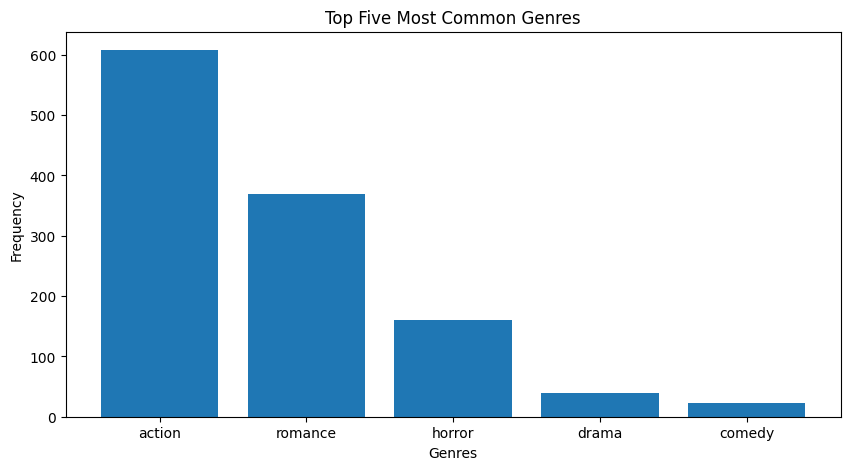

In [13]:
import matplotlib.pyplot as plt
from collections import Counter

# Definindo palavras-chave para cada gênero
genres_keywords = {
    'action': ['action', 'war', 'battle', 'fight'],
    'comedy': ['comedy', 'funny', 'humor', 'joke'],
    'drama': ['drama', 'serious', 'realistic'],
    'romance': ['romance', 'love', 'relationship'],
    'horror': ['horror', 'scary', 'fear', 'terror']
}

# Contando a frequência de cada gênero
genre_counts = Counter()

for overview in df['overview']:
    if isinstance(overview, str):  # Adicionando a verificação aqui
        for genre, keywords in genres_keywords.items():
            if any(keyword in overview for keyword in keywords):
                genre_counts[genre] += 1

# Selecionando os cinco gêneros mais comuns
top_five_genres = genre_counts.most_common(5)

# Gerando o gráfico de barras
genres, counts = zip(*top_five_genres)
plt.figure(figsize=(10,5))
plt.bar(genres, counts)
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Top Five Most Common Genres')
plt.show()